In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

from DataMining.NeuralN import NNfunctions

In [7]:
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata 
# print(breast_cancer_wisconsin_original.metadata)

In [4]:
# variable information 
print(breast_cancer_wisconsin_original.variables)

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

In [13]:
X.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses'],
      dtype='object')

# Data preprocessing

In [5]:
X.Bare_nuclei.agg(['mean', 'median', 'std', 'max', 'min'])

mean       3.544656
median     1.000000
std        3.643857
max       10.000000
min        1.000000
Name: Bare_nuclei, dtype: float64

<Axes: xlabel='Bare_nuclei'>

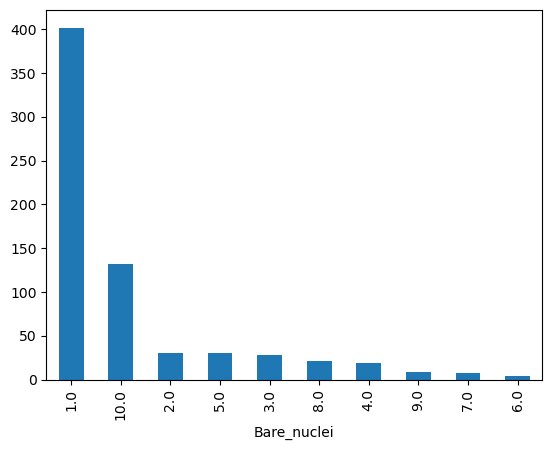

In [6]:
X.Bare_nuclei.value_counts().plot(kind='bar')

## Filling missing value with mode of the attribute

In [3]:
flags = (X['Bare_nuclei'].isna())
X.loc[flags, 'Bare_nuclei'] = 1

In [9]:
X.dropna()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


## Define normalization function for the data

In [4]:
# นิยามฟังก์ชันที่เองชื่อ normalize
def normalize(col):
    # ตัวแปรชื่อ col ที่รับมาจาก apply จะเป็นเพียงคอลัมน์ ๆ หนึ่งของ X_train
    return (col - col.mean())/col.std(ddof=0) # Standardization

# Split test and train data

In [5]:
labels = y['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.6,
                                                    random_state=123,
                                                    stratify=labels)
# X_train.count(), X_test.count()
print(f"Training records: {X_train.shape[0]}")
print(f"Test records: {X_test.shape[0]}")

Training records: 419
Test records: 280


## Before normalization

In [49]:
X.head(10)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
5,8,10,10,8,7,10.0,9,7,1
6,1,1,1,1,2,10.0,3,1,1
7,2,1,2,1,2,1.0,3,1,1
8,2,1,1,1,2,1.0,1,1,5
9,4,2,1,1,2,1.0,2,1,1


In [9]:
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## Applying normalization

In [8]:
# new_X_train = X_train.apply(normalize)

# new_X_test = X_test.apply(normalize)

import random

# bias = [random.uniform(-1, 1) for _ in range(len(X_train))]

new_X_train = X_train.apply(lambda x: normalize(x))
# new_X_train['bias'] = X_train.apply(lambda x: random.uniform(-1, 1))
# new_X_train['bias'] = bias


# bias = [random.uniform(-1, 1) for _ in range(len(X_test))]
new_X_test = X_test.apply(lambda x: normalize(x))
# new_X_test['bias'] = X_test.apply(lambda x: random.uniform(-1,1))
# new_X_test['bias'] = bias

new_X_train

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
203,0.217267,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261
608,0.217267,2.204929,2.250995,2.402457,3.088768,1.785449,2.736402,-0.614245,-0.349261
314,-1.222019,-0.692210,-0.752721,-0.629560,-0.982446,-0.699026,-0.571358,-0.614245,-0.349261
477,-0.142555,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.984828,-0.614245,-0.349261
70,0.217267,-0.692210,-0.085229,-0.629560,-0.530089,-0.699026,-0.571358,-0.614245,-0.349261
...,...,...,...,...,...,...,...,...,...
176,-0.862197,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261
258,-0.502376,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261
32,2.016374,1.239216,1.249756,0.044222,2.184054,0.405185,1.495992,0.353306,0.901511
553,-0.142555,0.273503,-0.418975,-0.629560,-0.530089,0.405185,-0.571358,-0.614245,0.276125


In [12]:
y_train

,Class
203,2
608,4
314,2
477,2
70,2
...,...
176,2
258,2
32,4
553,2


In [210]:
new_X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

new_X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Build and define neural network

In [44]:
new_X_train.iloc[0][8]

-0.34926073374496597

In [45]:
y.iloc[0][0]

2

In [8]:
x1 = [[1, 1], [2, 1]]
x2 = [[8, 7], [3, 4]]

np.multiply(x1, x2)

array([[8, 7],
       [6, 4]])

In [24]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()   # สร้างตัวแปลงเปล่า ๆ ขึ้นมา
# y_train.reset_index(drop=True, inplace=True)
one.fit(X_train)               # ส่งข้อมูลให้ตัวแปลงเพื่อประเมิน
y_train_onehot = one.transform(X_train) # หรือใช้ X_new = one.fit_transform(X) จบในตัวเดียว

y_train_onehot

<419x89 sparse matrix of type '<class 'numpy.float64'>'
	with 3771 stored elements in Compressed Sparse Row format>

In [28]:
print([[ i for i in x ] for x in y_train_onehot])

[[<1x89 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>], [<1x89 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>], [<1x89 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>], [<1x89 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>], [<1x89 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>], [<1x89 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>], [<1x89 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>], [<1x89 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>], [<1x89 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compr

## Work for one instance now has to implement more so that it can loop for entire dataset

In [20]:
from sklearn.metrics import accuracy_score
from NNfunctions import *
from LinearAlgebra import *
import numpy as np
from abc import ABC

# def binary_crossentropy_loss(a, y):
#     # return (-(y * np.log(a) - (1-y) * np.log(1-a))).mean()
#     m, n = a.shape
#     sum_loss = 0
# 
#     for i in range(m) :
#         sum_loss += (-y[i] * np.log(a[i])) - ((1-y[i]) * np.log(1-a[i]))
# 
#     result = (1/m) * sum_loss
#     # print(sum_loss)
#     return result

def calculate_mse(actual, predicted):
    return (actual - predicted) ** 2

class NeuralNetwork:
    def __init__(self, X_data, y_data, epochs, batch_size=32, eta=0.1, lmbd=0.0, n_hidden_neurons=50, n_categories=2):
        self.X_data_full = X_data
        self.y_data_full = y_data
        self.n_hidden_neurons = n_hidden_neurons
        self.n_inputs = X_data.shape[0]
        self.n_features = X_data.shape[1]
        self.n_categories = n_categories # Class
        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmdb = lmbd

    def create_biases_and_weights(self):
        self.hidden_weights = np.random.randn(self.n_features, self.n_hidden_neurons)
        self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01

        self.output_weights = np.random.randn(self.n_hidden_neurons, self.n_categories)
        self.output_bias = np.zeros(self.n_categories) + 0.01

    def feed_forward(self):
        # feed-forward for training
        self.z_h = np.matmul(self.X_data, self.hidden_weights) + self.hidden_bias
        self.a_h = sigmoid(self.z_h)

        self.z_o = np.matmul(self.a_h, self.output_weights) + self.output_bias

        exp_term = np.exp(self.z_o)
        self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)

    def feed_forward_out(self, X):
        # feed-forward for output
        z_h = np.matmul(X, self.hidden_weights) + self.hidden_bias
        a_h = sigmoid(z_h)

        z_o = np.matmul(a_h, self.output_weights) + self.output_bias

        exp_term = np.exp(z_o)
        probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        return probabilities

    def backpropagation(self):
        error_output = self.probabilities - self.Y_data
        error_hidden = np.matmul(error_output, self.output_weights.T) * self.a_h * (1 - self.a_h)

        self.output_weights_gradient = np.matmul(self.a_h.T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)

        self.hidden_weights_gradient = np.matmul(self.X_data.T, error_hidden)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmbd > 0.0:
            self.output_weights_gradient += self.lmbd * self.output_weights
            self.hidden_weights_gradient += self.lmbd * self.hidden_weights

        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        self.hidden_weights -= self.eta * self.hidden_weights_gradient
        self.hidden_bias -= self.eta * self.hidden_bias_gradient

    def predict(self, X):
        probabilities = self.feed_forward_out(X)
        return np.argmax(probabilities, axis=1)

    def predict_probabilities(self, X):
        probabilities = self.feed_forward_out(X)
        return probabilities

    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                # pick datapoints with replacement
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=False
                )

                # minibatch training data
                self.X_data = self.X_data_full[chosen_datapoints]
                self.Y_data = self.y_data_full[chosen_datapoints]

                self.feed_forward()
                self.backpropagation()

epochs = 100
batch_size = 16

from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()   # สร้างตัวแปลงเปล่า ๆ ขึ้นมา
y_train.reset_index(drop=True, inplace=True)
one.fit(y_train)               # ส่งข้อมูลให้ตัวแปลงเพื่อประเมิน
y_train_onehot = one.transform(y_train) # หรือใช้ X_new = one.fit_transform(X) จบในตัวเดียว

new_X_train.reset_index(drop=True, inplace=True)
dnn = NeuralNetwork(new_X_train, y_train_onehot, epochs=30, batch_size=batch_size)
dnn.train()
test_predict = dnn.predict(X_test)

# accuracy score from scikit library
print("Accuracy score on test set: ", accuracy_score(y_test, test_predict))

# equivalent in numpy
def accuracy_score_numpy(Y_test, Y_pred):
    return np.sum(Y_test == Y_pred) / len(Y_test)

print("Accuracy score on test set: ", accuracy_score_numpy(y_test, test_predict))

AttributeError: 'NoneType' object has no attribute 'reset_index'

In [93]:
new_X_train

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,bias
203,0.217267,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261,-0.086755
608,0.217267,2.204929,2.250995,2.402457,3.088768,1.785449,2.736402,-0.614245,-0.349261,-0.086755
314,-1.222019,-0.692210,-0.752721,-0.629560,-0.982446,-0.699026,-0.571358,-0.614245,-0.349261,-0.086755
477,-0.142555,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.984828,-0.614245,-0.349261,-0.086755
70,0.217267,-0.692210,-0.085229,-0.629560,-0.530089,-0.699026,-0.571358,-0.614245,-0.349261,-0.086755
...,...,...,...,...,...,...,...,...,...,...
176,-0.862197,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261,-0.086755
258,-0.502376,-0.692210,-0.752721,-0.629560,-0.530089,-0.699026,-0.157888,-0.614245,-0.349261,-0.086755
32,2.016374,1.239216,1.249756,0.044222,2.184054,0.405185,1.495992,0.353306,0.901511,-0.086755
553,-0.142555,0.273503,-0.418975,-0.629560,-0.530089,0.405185,-0.571358,-0.614245,0.276125,-0.086755


In [28]:
# for i in range(len(new_X_train)):
#     print(new_X_train.iloc[i])
    
print([x for x in new_X_train])

['Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'bias']


In [18]:
import matplotlib.pyplot as plt
import torch

model = LogisticRegression()

lr = 0.02   # learning rate
losses = []

for epoch in range(300):
    for xb, yb in new_X_train, y_train: # ป้อนข้อมูลเข้าโมเดลทีละ batch โดยดึงจาก Dataloader
        ab = model.forward_propagation(xb)     # forward propatation
        loss = binary_crossentropy_loss(ab, yb)
        dw, db = model.backpropagation(xb, yb)  # backpropagation
        model.w = model.w - lr*dw          # gradient update
        model.b = model.b - lr*db          # gradient update
        losses.append( loss )  # เก็บ loss แต่ละรอบเอาไว้วาดดูว่า เทรนแล้ว loss ลดลงไหม

plt.figure()
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost');

ValueError: too many values to unpack (expected 2)

In [211]:
new_X_train.iloc[0]

Clump_thickness                0.217267
Uniformity_of_cell_size       -0.692210
Uniformity_of_cell_shape      -0.752721
Marginal_adhesion             -0.629560
Single_epithelial_cell_size   -0.530089
Bare_nuclei                   -0.699026
Bland_chromatin               -0.157888
Normal_nucleoli               -0.614245
Mitoses                       -0.349261
Name: 203, dtype: float64

In [21]:
def binary_crossentropy_loss(a, y):
    # return -(y * np.log(a) - (1 - y) * np.log(1 - a))
    m, n = a.shape
    sum_loss = 0

    for i in range(m) :
        sum_loss += (-y[i] * np.log(a[i])) - ((1-y[i]) * np.log(1-a[i]))

    result = (1/m) * sum_loss
    # print(sum_loss)
    return result

In [22]:
from NNfunctions import * # ถ้า import * คือเอาทุก function ในไฟล์ NNfunction
import random

E: list[float] = []
iterations: list[int] = []
iter:int = 1
error_list: list[float] = []
# W10: list[float] = []
# W11: list[float] = []

W10: list[float]=[ random.uniform(-1,1) for _ in range(new_X_train.shape[1]) ] #weight ที่เกี่ยวข้องกับ node 10 [w1_10,w2_10,w3_10,w4_10,w5_10,w6_10,w7_10,w8_10,w9_10,bias10]
W11: list[float]=[  random.uniform(-1,1) for _ in range(new_X_train.shape[1]) ] #weight ที่เกี่ยวข้องกับ node 11

b12n = 1 # init input bias for node 12
W12: list[float]=([ random.uniform(-1,1) for _ in range(3) ])

# b13n = 1
# W13: list[float]=([ random.uniform(-1,1) for _ in range(3) ])

totalError = 0
epochs = 10
for _ in range(epochs):
    for i in range(len(new_X_train)):
        X=new_X_train.to_numpy()[i] # input X
            
        y=y_train.to_numpy()[i] #desire output
            
        l=-0.9 # learning rate

        print(f"\n<---- Round:{iter} ---->")
        iterations.append(iter)
        iter += 1
            
        print("\n-----Forward pass-----> ")
        o10=Nout(X, W10) #call NNfunction
        y10=sigmoid(o10) #call NNfunction
        print("\nSum(V) of node 10 is: %8.3f, Y from node 10 is: %8.3f" % (o10,y10))
        #คำนวน y10
        
        o11=Nout(X, W11)
        y11=sigmoid(o11)
        #คำนวน y11
        #print ผลลัพธ์
        print("\nSum(V) of node 11 is: %8.3f, Y from node 11 is: %8.3f" % (o11,y11))
        
        X12 = ([y10, y11, 1])
        o12 = Nout(X12, W12)
        y12 = sigmoid(o12)
        print("\nSum(V) of node 12 is: %8.3f, Y from node 12 is: %8.3f" % (o12,y12))
        #node 12

        # mapping output layer of these neurons to class number 2 & 4
        y_pred: int = 2 if y12 < 0.5 else 4

        print(f"\n<---- Predict:{y_pred} | Actual class:{y} ---->")
        # Compute error
        # e: float = (y - y_pred)**2 # MSE loss compute
        e:float = binary_crossentropy_loss(y, y_pred)
        totalError += e
        print(f"\n<---- loss: {totalError:.3f}")
        error_list.append(e)
        
        #backpropagation
        print("\n<---- Back propagation & calculate new Weights and Biases ----")
            
        g12 = gradOut(e, y12) #call NNfunction
        
        dw10_12 = deltaWeight(l, g12, y10) #call NNfunction
        w10_12n = W12[0]+dw10_12
        dw11_12 = deltaWeight(l, g12, y11)
        w11_12n = W12[1]+dw11_12
        db12 = deltaWeight(l, g12, W12[2])
        b12n = W12[2]+db12
        
        # Update weight & bias for node 12
        W12 = [w10_12n, w11_12n, b12n]
        print("\nNew w10_12 is %8.3f, New w11_12 is:%8.3f, New bias 12 is %8.3f"% (w10_12n, w11_12n, b12n))
        
            # g13 = gradOut(e, y13) #call NNfunction
            # 
            # dw10_13 = deltaWeight(l, g13, y10) #call NNfunction
            # w10_13n = W13[0]+dw10_13
            # dw11_13 = deltaWeight(l, g13, y11)
            # w11_13n = W13[1]+dw11_12
            # db13 = deltaWeight(l, g13, W13[2])
            # b13n = W13[2]+db13
            # 
            # # Update weight & bias for node 13
            # W13 = [w10_13n, w11_13n, b13n]
            # print("\nNew w10_13 is %8.3f, New w11_13 is:%8.3f, New bias 13 is %8.3f"% (w10_13n, w11_13n, b13n))
            
        
        #node10
        #pre gradient10 = g12*w10_12 + g13*w10_13
        # sumN10w = g12*(W12[0]) + g13*(W13[0])
        sumN10w = g12*(W12[0])
        g10 = gradHidden(y12, sumN10w)
        
        dw1_10 = deltaWeight(l, g10, new_X_train.iloc[i][0])
        w1_10n = W10[0]+dw1_10
        dw2_10 = deltaWeight(l, g10, new_X_train.iloc[i][1])
        w2_10n = W10[1]+dw2_10
        dw3_10 = deltaWeight(l, g10, new_X_train.iloc[i][2])
        w3_10n = W10[2]+dw3_10
        dw4_10 = deltaWeight(l, g10, new_X_train.iloc[i][3])
        w4_10n = W10[3]+dw4_10
        dw5_10 = deltaWeight(l, g10, new_X_train.iloc[i][4])
        w5_10n = W10[4]+dw5_10
        dw6_10 = deltaWeight(l, g10, new_X_train.iloc[i][5])
        w6_10n = W10[5]+dw6_10
        dw7_10 = deltaWeight(l, g10, new_X_train.iloc[i][6])
        w7_10n =W10[6]+dw7_10
        dw8_10 = deltaWeight(l, g10, new_X_train.iloc[i][7])
        w8_10n = W10[7]+dw8_10
        db10 = deltaWeight(l, g10, W10[8])
        b10n = W10[8]+db10
        
        # # Update weight & bias
        W10 = [w1_10n, w2_10n, w3_10n, w4_10n, w5_10n, w6_10n, w7_10n, w8_10n, b10n]
        print("\nNew w1_10 is %8.3f, New w2_10 is:%8.3f, New w3_10 is:%8.3f, New w4_10 is:%8.3f, New w5_10 is:%8.3f, New w6_10 is:%8.3f, New w7_10 is:%8.3f, New w8_10 is:%8.3f, , New bias 10 is %8.3f"% (w1_10n, w2_10n, w3_10n, w4_10n, w5_10n, w6_10n, w7_10n, w8_10n, b10n))
            
        # node11
        #pre gradient11=g12*w11_12 + g13*w11_13
        # sumN11w = g12*(W12[1]) + g13*(W13[1])
        sumN11w = g12*(W12[1])
        g11 = gradHidden(y11, sumN11w)
        
        dw1_11 = deltaWeight(l, g11, new_X_train.iloc[i][0])
        w1_11n = W11[0]+dw1_11
        dw2_11 = deltaWeight(l, g11, new_X_train.iloc[i][1])
        w2_11n = W11[1]+dw2_11
        dw3_11 = deltaWeight(l, g11, new_X_train.iloc[i][2])
        w3_11n = W11[2]+dw3_11
        dw4_11 = deltaWeight(l, g11, new_X_train.iloc[i][3])
        w4_11n = W11[3]+dw4_11
        dw5_11 = deltaWeight(l, g11, new_X_train.iloc[i][4])
        w5_11n = W11[4]+dw5_11
        dw6_11 = deltaWeight(l, g11, new_X_train.iloc[i][5])
        w6_11n = W11[5]+dw6_11
        dw7_11 = deltaWeight(l, g11, new_X_train.iloc[i][6])
        w7_11n = W11[6]+dw7_11
        dw8_11 = deltaWeight(l, g11, new_X_train.iloc[i][7])
        w8_11n = W11[7]+dw8_11    
        db11 = deltaWeight(l, g11, W11[8])
        b11n = W11[8]+db11
            
        # Update weight & bias
        W11 = [w1_11n, w2_11n, w3_11n, w4_11n, w5_11n, w6_11n, w7_11n, w8_11n, b11n]
        print("\nNew w1_11 is %8.3f, New w2_11 is:%8.3f, New w3_11 is:%8.3f, New w4_11 is:%8.3f, New w5_11 is:%8.3f, New w6_11 is:%8.3f, New w7_11 is:%8.3f, New w8_11 is:%8.3f, New bias 11 is %8.3f"% (w1_11n, w2_11n, w3_11n, w4_11n, w5_11n, w6_11n, w7_11n, w8_11n, b11n))
            
        print(f"{e}")


<---- Round:1 ---->

-----Forward pass-----> 

Sum(V) of node 10 is:   -0.129, Y from node 10 is:    0.468

Sum(V) of node 11 is:   -1.274, Y from node 11 is:    0.219

Sum(V) of node 12 is:    0.232, Y from node 12 is:    0.558

<---- Predict:4 | Actual class:2 ---->


ValueError: not enough values to unpack (expected 2, got 0)

# Plotting loss

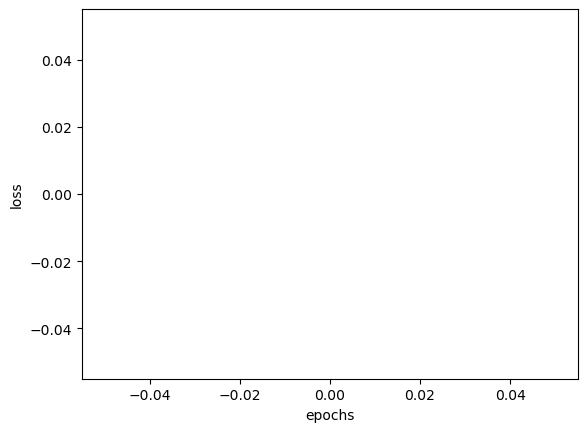

In [18]:
import matplotlib.pyplot as plt

plt.plot(iterations, error_list)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [10]:
from NNfunctions import *
from typing import List

def forward_propagation(x: List[float], n: int, weights: List[float]) -> float:
    o = Nout(x, weights)
    y = sigmoid(o)
    print(f"\nSum(V) of node {n} is: %8.3f, Y from node {n} is: %8.3f" % (o, y))
    return y


def backpropagation(learning_rate: float, gradient: float, x: List[float], weights: List[float]) -> float:
    b = []
    for i in range(len(X)):
        b.append(weights[i] + (deltaWeight(learning_rate, gradient, x[i])))
    return b


In [11]:
def approximate(x, w10, w11, w12, w13, w14, desire_output, learning_rate):
    print("\n-----Forward pass----->")
    # forward pass
    y10 = forward_propagation(x, w10, 10)

    y11 = forward_propagation(x, w11, 11)

    y12 = forward_propagation(x, w12, 12)

    z = [y10, y11, y12, 1]
    y13 = forward_propagation(z, w13, 13)

    y14 = forward_propagation(z, w14, 14)

    e13 = desire_output - y13
    e14 = desire_output - y14
    print("\nError of node 13 is: %8.3f, Error of node 14 is: %8.3f" % (e13, e14))
    e = (e13 + e14) / 2

    if e != 0:
        print("\n-----Backward pass----->")
        g14 = gradOut(e, y14)
        w14 = backpropagation(g14, learning_rate, z, w14)
        print("\nNew weights of node 14 are: %8.3f, %8.3f, %8.3f, %8.3f" % (w14[0], w14[1], w14[2], w14[3]))

        g13 = gradOut(e, y13)
        w13 = backpropagation(g13, learning_rate, z, w13)
        print("\nNew weights of node 13 are: %8.3f, %8.3f, %8.3f, %8.3f" % (w13[0], w13[1], w13[2], w13[3]))

        g12 = gradHidden(y12, (g14 * w14[2]) + (g13 * w13[2]))
        w12 = backpropagation(g12, learning_rate, x, w12)
        print("\nNew weights of node 12 are: %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f" % (
            w12[0], w12[1], w12[2], w12[3], w12[4], w12[5], w12[6], w12[7], w12[8], w12[9]))

        g11 = gradHidden(y11, (g14 * w14[1]) + (g13 * w13[1]))
        w11 = backpropagation(g11, learning_rate, x, w11)
        print("\nNew weights of node 11 are: %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f" % (
            w11[0], w11[1], w11[2], w11[3], w11[4], w11[5], w11[6], w11[7], w11[8], w11[9]))

        g10 = gradHidden(y10, (g14 * w14[0]) + (g13 * w13[0]))
        w10 = backpropagation(g10, learning_rate, x, w10)
        print("\nNew weights of node 10 are: %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f, %8.3f" % (
            w10[0], w10[1], w10[2], w10[3], w10[4], w10[5], w10[6], w10[7], w10[8], w10[9]))

    return e, w10, w11, w12, w13, w14

# reset Variables

In [2]:
%reset -f

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split

# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

flags = (X['Bare_nuclei'].isna())
X.loc[flags, 'Bare_nuclei'] = 1

# นิยามฟังก์ชันที่เองชื่อ normalize
def normalize(col):
    # ตัวแปรชื่อ col ที่รับมาจาก apply จะเป็นเพียงคอลัมน์ ๆ หนึ่งของ X_train
    return (col - col.mean())/col.std(ddof=0) # Standardization

labels = y['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.6,
                                                    random_state=123,
                                                    stratify=labels)
X_train.count(), X_test.count()

new_X_train = X_train.apply(normalize)
new_X_test = X_test.apply(normalize)

# Training the Model

In [6]:
new_X_train.shape[0]

419

In [5]:
new_X_train.to_numpy()[1]

array([ 0.2172669 ,  2.2049294 ,  2.25099477,  2.40245715,  3.08876843,
        1.78544908,  2.73640183, -0.61424463, -0.34926073])

In [25]:
y_train.Class.to_numpy()[1]

array([4], dtype=int64)

In [51]:
w1 = 2*np.random.rand(X_train.shape[1]) - 0.5
w1

array([ 0.69014287,  1.47333325,  0.45681172, -0.24341973,  0.47001923,
        1.38122076,  1.2903517 ,  0.81384445, -0.39864201])


W1: [[ 0.22429076  0.37121549  1.03649954  0.76670221  1.23655141  1.09990957
   0.426893    0.36780042  1.3479768 ]
 [ 0.95879595  0.87039874 -0.12524202  0.08971939  0.93241606 -0.0959043
   1.48972424  0.6631825   0.77772205]
 [ 1.24384141 -0.41854689  0.341775   -0.49448278  0.39631833  0.53278757
   0.55776137  0.47242158 -0.22024082]
 [ 0.81292711  0.24420765  1.2948854   1.43719897  0.01743576  0.4129389
  -0.46664297  0.75571011  1.2898618 ]
 [ 0.67339385  0.71053072  0.37403946  0.7027977   0.11902197  1.26194043
   0.36808397  0.63769376 -0.47536569]
 [ 1.16125262  0.41715772 -0.28671649 -0.33996113  1.04562531  0.47966603
  -0.28027805 -0.43423778  0.85196456]
 [ 0.2219202   1.13585745  0.98461006 -0.25346185  1.43007333  0.57086022
   0.59963268  1.36092456 -0.41260212]
 [-0.01075845  0.00792951 -0.46768032  0.81941692  0.56375759  0.18933239
  -0.25667533 -0.28819334 -0.23874347]
 [-0.47227421  0.26411518  0.72783705  1.06762767 -0.47039     1.0201659
   1.40295157  0.666

C:\Anda\data\DataMining\NeuralN\NNfunctions.py:18: RuntimeWarning: overflow encountered in exp
  f = 1 / (1 + np.exp(-x))



W1_n: [[22.26208558  3.50360819  4.54606644 -1.81391391 -3.46615509 10.52473895
   9.75186856 16.11054997 11.8312843 ]
 [19.81656479  6.01594364  1.04719147  6.39685094 -4.80502018 12.76734534
   9.58334635 13.02046582 11.57076446]
 [19.39140914  5.62478935  1.64131156  6.34779806 -4.90176427 12.9711876
   9.50608418 13.37323149 11.64067414]
 [28.749679    7.70196215  7.30981569  7.48973599 -2.68141321 15.55616629
   8.20159524 19.0682722  13.94722738]
 [21.0918555   3.76442774  3.89787149 -1.93654968 -4.22282014 10.79729171
   9.29439853 15.5910552  11.04144221]
 [32.7451492   4.36042375  6.16028227 10.95039491 -1.92291326 20.45443445
  16.17660698 15.73813205 15.80986545]
 [30.37942904  8.9649487   4.89651675 12.24247241 -2.22966664 21.9910279
  13.83774701 19.04306412 17.29900272]
 [19.60206666  5.87364853  1.77205465  6.19757197 -4.45193348 12.67469409
   9.26455934 13.49781549 11.38521265]
 [18.56074357  8.50650874 14.01744242 10.03016018 30.36750397 37.1254187
  16.80066781 13.6

Text(0, 0.5, 'Cost')

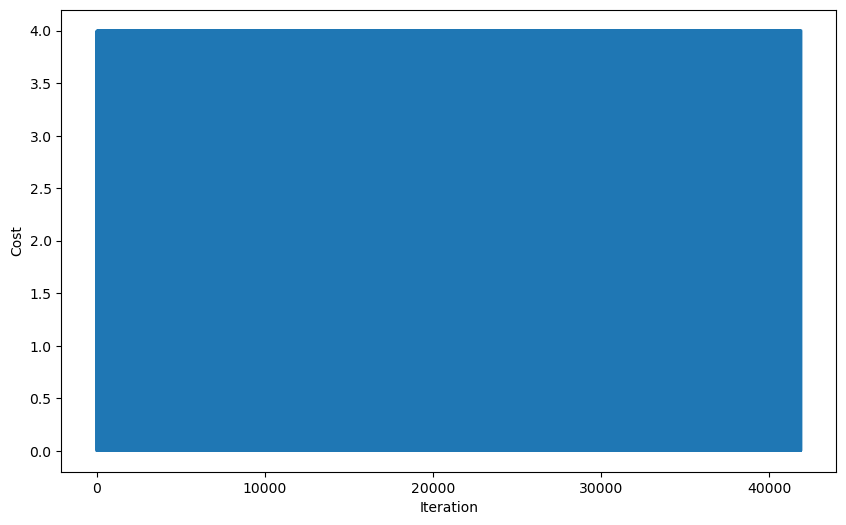

In [203]:
import NNfunctions
import importlib
importlib.reload(NNfunctions)

from NNfunctions import *
import matplotlib.pyplot as plt

# Set up the number of perceptron per each layer:
p=9 # Layer 1
# q=4 # Layer 2
q=1 # Output Layer

# Set up the Learning rate & epochs
eta =  0.01
epochs = 100

# 0: Random initialize the relevant data 
w1 = 2*np.random.rand(p, new_X_train.shape[1]) - 0.5 # Layer 1
# b1 = np.random.rand(p)

w2 = 2*np.random.rand(p , new_X_train.shape[1]) - 0.5  # Layer 1
# b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
# bOut = np.random.rand(1)

print(f"\nW1: {w1}\nW2: {w2}\nW3: {wOut}")

mu = []
vec_y = []
losses = []

# Start looping over the passengers, i.e. over I.
for _ in range(epochs):
    for I in range(0, X_train.shape[0]): #loop in all the passengers:
        # 1: input the data 
        x = new_X_train.to_numpy()[I]
        
        # 2: Start the algorithm
        
        # 2.1: Feed forward
        # z1 = ReLU_act(np.dot(w1, x)) # output layer 1 
        # z2 = ReLU_act(np.dot(w2, x)) # output layer 2
        z1 = sigmoid_act(np.dot(w1, x), der=False) # output layer 1
        z2 = sigmoid_act(np.dot(w2, x), der=False) # output layer 1
        x_out = np.dot(z1, z2)
        y = sigmoid_act(np.dot(wOut, x_out), der=False) # Output of the Output layer
        
        y = 2 if y < 0.5 else 4
        
        #2.2: Compute the output layer's error
        delta_Out =  (y-y_train.Class.to_numpy()[I]) * sigmoid_act(y, der=True)
        
        #2.3: Backpropagate
        delta_2 = (delta_Out * wOut) * sigmoid_act(z2, der=True) # First Layer Error
        delta_1 = (delta_Out * wOut) * sigmoid_act(z1, der=True) # First Layer Error
            
        # 3: Gradient descent 
        wOut -= eta*delta_Out*x_out # Outer Layer
        
        w2 -= eta*np.kron(delta_2, x).reshape(p, x.shape[0]) # Hidden Layer 2
        
        w1 -= eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
        
        # 4. Computation of the loss function
        losses.append( (y-y_train.Class.to_numpy()[I])**2 )
        # mu.append((y-y_train.Class.to_numpy()[I])**2 )
        vec_y.append(y)

print(f"\nW1_n: {w1}\nW2_n: {w2}\nW3_n: {wOut}")
# Plotting the Cost function for each training data     
plt.figure(figsize=(10,6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Cost')

# plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, label='mu')
# plt.title('Loss for each training data point', fontsize=20)
# plt.xlabel('Training data', fontsize=16)
# plt.ylabel('Loss', fontsize=16)
# plt.show()




# Plotting the average cost function over 10 training data    
# print(len(vec_y))
# pino = []
# for i in range(0, 9):
#     pippo = 0
#     for m in range(0, 42):
#         pippo += vec_y[40*i+m]/40
#     pino.append(pippo)
# 
# plt.figure(figsize=(10,6))
# plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
# plt.title('Averege Loss by epoch', fontsize=20)
# plt.xlabel('Epoch', fontsize=16)
# plt.ylabel('Loss', fontsize=16)
# plt.show()

In [100]:
x = new_X_train.to_numpy()[1]

# 2: Start the algorithm

# 2.1: Feed forward
z1 = ReLU_act(np.dot(w1, x)) # output layer 1 
z2 = ReLU_act(np.dot(w2, x)) # output layer 2
# z1 = sigmoid_act(np.dot(w1, x), der=False) # output layer 1
# z2 = sigmoid_act(np.dot(w2, x), der=False) # output layer 1

# print(z1, "\n", z2)
x_out = np.dot(z1, z2)
# print(x_out)
y = sigmoid_act(np.dot(wOut, x_out))
# print(y)
# print(y-y_train.to_numpy()[1])
delta_Out =  (y-y_train.Class.to_numpy()[1]) * sigmoid_act(y, der=True)
# print(delta_Out)

# sigmoid_act(y, der=True)
delta_2 = delta_Out * wOut * sigmoid_act(z2, der=True)
# delta_2

array([7.53303139e+14, 7.53303139e+14, 7.53303139e+14, 7.53303139e+14,
       7.53303139e+14, 7.53303139e+14, 7.53303139e+14, 7.53303139e+14,
       7.53303139e+14])

In [63]:
X_train.shape[0]

419

# Build NeuralNetwork model

In [30]:
import numpy as np

def initialize_parameters(layer_dims):

    # หมายเหตุ ฟังก์ชันนี้ทำหน้าที่กำหนดค่าเริ่มต้นให้พารามิเตอร์ของโมเดล ซึ่งใช้เทคนิคชื่อ
    # Xavier initialization ซึ่งสามารถดูคำอธิบายเพิ่มเติมได้ที่
    # https://www.deeplearning.ai/ai-notes/initialization/index.html
    # ซึ่งจะอธิบายถึงสาเหตุของการที่ weight หารด้วย sqrt(layer_dims[l-1])

    parameters = {}
    L = len(layer_dims)            # number of layers in the network
    for l in range(1, L):
        parameters[f'W{l}'] = np.random.randn(layer_dims[l-1], layer_dims[l]) / np.sqrt(layer_dims[l-1])
        parameters[f'b{l}'] = np.zeros((layer_dims[l], 1))
        assert(parameters[f'W{l}'].shape == (layer_dims[l-1], layer_dims[l]))
        assert(parameters[f'b{l}'].shape == (layer_dims[l],1))
    return parameters

In [55]:
def linear_forward(A, W, b):
    """
    Arguments:
    A -- activations from previous layer (or input data): array of shape (number of examples, size of previous layer)
    W -- weights matrix: array of shape (size of previous layer, size of current layer)
    b -- bias vector: array of shape (size of the current layer,1)

    Returns:
    Z -- output of linear unit
    cacheAWb -- a python tuple containing (A,W,b), stored for computing the backward pass efficiently
    """
    ### START CODE HERE ### (≈ 1 line of code)
    Z = (A @ W) + b.T
    ###  END CODE HERE  ###
    cacheAWb = (A, W, b)

    return Z, cacheAWb

def linear_backward(dZ, cacheAWb):
    """
    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cacheAWb
    n = A_prev.shape[0]    # จำนวน examples
    ### START CODE HERE ### (≈ 3 lines of code)
    # Hint: ในการหาค่า sum อาจใช้ torch.sum(...., dim=0, keepdims=True)
    dW = (1/n)*( dZ.T @ A_prev).T
    db = (1/n)*np.sum(dZ , axis=0, keepdims=True).T
    dA_prev = W @ dZ.T
    ### END CODE HERE ###

    return dA_prev, dW, db

In [35]:
def sigmoid_forward(Z):
    """ Implements the ReLU activation
    Arguments: Z -- tensor of any shape
    Returns:
       A -- output of max{0,z}, same shape as Z
       Z -- Z will be useful during backpropagation
    """
    ### START CODE HERE ### (≈ 1 line of code)
    A = 1 / (1 + np.exp(-Z))
    ###  END CODE HERE  ###
    return A, Z

def diff_sigmoid(Z):
    if (1-Z) > 0:
        f = Z / (1 - Z)
    else:
        f = Z / ((1 - Z) + 1e-6)
    return f

def sigmoid_backward(dA, cache):
    """ Implement the backward propagation for a single ReLU unit.
    Arguments:
       dA -- post-activation gradient, of any shape
       cache -- 'Z' where we store for computing backward propagation efficiently
    Returns: dZ -- Gradient of the cost with respect to Z
    """
    Z = cache
    ### START CODE HERE ### (≈ 1 lines of code)
    dZ = diff_sigmoid(Z) * dA
    ### END CODE HERE ###
    assert (dZ.shape == Z.shape)
    return dZ

In [56]:
def softmax_forward(Z):
    ### START CODE HERE ### (≈ 1 line of code)
    # Hint: Use torch.sum(...., dim=1, keepdims=True)
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)
    ###  END CODE HERE  ###
    return A, Z

In [63]:
def model_forward(X, parameters):
    """ Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SOFTMAX
    Arguments:
       X -- design matrix, tensor of shape (number of examples, number of features)
       parameters -- output of initialize_parameters()
    Returns:
       AL -- output from the last layer (last post-activation value)
       caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = np.array(X).flatten()  # reshape input
    L = len(parameters) // 2   # number of layers in the neural network

    # Forward propagate through the first L-1 layers
    for l in range(1, L):
        A_prev = A
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, cache_linear = linear_forward(A_prev, parameters[f"W{l}"], parameters[f"b{l}"] )
        A, cache_relu = sigmoid_forward(Z)
        ### END CODE HERE ###
        caches.append((cache_linear, cache_relu))

    # Forward propagate the output layer
    ### START CODE HERE ### (≈ 2 lines of code)
    Z, cache_linear = linear_forward(A, parameters[f"W{L}"], parameters[f"b{L}"])
    AL, cache_softmax = softmax_forward(Z)
    ### END CODE HERE ###
    caches.append((cache_linear, cache_softmax))
    # assert(AL.shape == (X.shape[0],10))
    return AL, caches

def model_backward(AL, Y, caches):
    """ Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SOFTMAX
    Arguments:
        AL -- probability matrix, i.e. output of the forward propagation
        Y  -- true label matrix (one-hot)
        caches -- list of caches containing:
                every cache of relu_forward() (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of softmax_forward() (it's caches[L-1])
    Returns:
       grads -- A dictionary with the gradients
                 grads[f'dA{l}'] = ...
                 grads[f'dW{l}'] = ...
                 grads[f'db{l}'] = ...
    """
    grads = {}      # dictionary of gradients
    L = len(caches) # number of layers
    n = AL.shape[0] # number of examples

    # 1) Initialize backpropagation
    ### START CODE HERE ### (1 line of code)
    # Compute derivative of loss with respect to AL
    dAL = AL-Y
    ### END CODE HERE ###

    # 2) Lth layer (SOFTMAX -> LINEAR) gradients.
    linear_cache, _ = caches[L-1]
    ### START CODE HERE ### (approx. 2 lines)
    dZ = dAL
    grads[f'dA{L-1}'], grads[f'dW{L}'], grads[f'db{L}'] = linear_backward(dZ, linear_cache)
    ### END CODE HERE ###

    # 3) Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        linear_cache, activation_cache = caches[l]
        ### START CODE HERE ### (approx. 2 lines)
        dZ = sigmoid_backward(grads[f'dA{l+1}'].T, activation_cache )
        grads[f'dA{l}'], grads[f'dW{l+1}'], grads[f'db{l+1}'] = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###

    return grads

In [59]:
def compute_loss(AL, Y):
    """Implement the categorical cross entropy loss
    Arguments:
       AL -- probability matrix whose row corresponds to prediction of one example
       Y -- true label matrix whose row corresponds to true label of one example
    Returns:
       loss -- categorical cross-entropy loss of m examples
    """
    n = Y.shape[0]  # จำนวน examples
    # assert(Y.shape[1] == 10)

    # Compute categorical cross entropy loss of m examples from AL and Y
    loss = -(1/n)*np.sum(Y*torch.log(AL))
    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    return loss

In [40]:
def gradient_update(parameters, grads, learning_rate):
    """ Update parameters using gradient descent
    Arguments:
       parameters -- python dictionary containing your parameters
       grads -- python dictionary containing your gradients (it is the output of model_backward())
       learning_rate -- learning rate
    Returns:
       parameters -- python dictionary containing your updated parameters
                  parameters[f'W{l}'] = ...
                  parameters[f'b{l}'] = ...
    """
    L = len(parameters) // 2 # number of layers in the neural network
    # Update rule for each parameter.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(1, L):
        parameters[f'W{l}'] -= learning_rate*grads[f'dW{l}']
        parameters[f'b{l}'] -= learning_rate*grads[f'db{l}']
    ### END CODE HERE ###
    return parameters


In [69]:
y_train.iloc[1].to_numpy()[0]

4

In [70]:
import torch
import torch.nn.functional as F

nn_architecture = (9*1, 4, 4, 1)
params = initialize_parameters(nn_architecture)
# print(nn_architecture)

learning_rate = 0.01
num_epochs = 100

train_losses = []
val_losses = []

for epoch in range(num_epochs):

    # TRAINING loop
    train_loss, train_acc, n_train = 0.0, 0.0, 0
    for i in range(0, len(new_X_train)):

        ### START CODE HERE ###
        # Create one-hot
        # Hint: Use F.one_hot(...)
        # y_batch_one_hot =  F.one_hot(y_train, num_classes=10).float()
        # Forward propagation
        al, caches = model_forward(new_X_train.iloc[i], params)
        # Back propagation
        gradients = model_backward(al, y_train.iloc[i].to_numpy()[0],caches )

        # Gradient update
        params = gradient_update(params, gradients , learning_rate)
        ### END CODE HERE ###

        # Compute loss (for debugging)
        train_loss += compute_loss(al, y_train.iloc[i])

        # Compute accuracy (for debugging)
        y_preds = torch.argmax(al, dim=1) # convert one-hot to index
        train_acc += torch.sum(y_preds == y_train.iloc[i]).item()
        n_train += len(y_train.iloc[i])

    trn_loss = train_loss/len(new_X_train)
    trn_acc = train_acc/n_train
    print(f'Epoch {epoch}: train_loss {trn_loss:.4f}, train_acc {trn_acc:.4f}')
    train_losses.append(trn_loss)

# plot loss history
plt.plot(range(len(train_losses)), train_losses, label='training loss')
plt.legend()    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [71]:
X = new_X_train.iloc[0]
W = [random.uniform(-1, 1) for _ in range(0, 9)]
Z = np.dot(X, W)

diff_sigmoid(Z)

-14.449642144324653